## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Conv-Project-2/"

In [0]:
import os

In [0]:
os.chdir(project_path)

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
import pandas as pd



In [0]:
labels=pd.read_csv('labels.csv')

### Print the count of each category of Dogs given in the dataset



In [7]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [0]:
label_encoder=LabelEncoder()

In [0]:
labels_decoded=label_encoder.fit_transform(labels['breed'])

In [11]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
y = tf.keras.utils.to_categorical(labels_decoded, dtype='float32')
y=np.array(y)

TensorFlow 2.x selected.


In [12]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_rows=128
img_cols=128
num_channels=3


In [14]:
from tqdm import tqdm
import cv2
x_feature=[]
y_feature=[]

for dogid, img in tqdm(labels.values):
  train_img=cv2.imread('./train/{}.jpg'.format(dogid), 1)
  train_img_resize=cv2.resize(train_img, (img_rows, img_cols))
  x_feature.append(train_img_resize)
  y_feature.append(img)



100%|██████████| 10222/10222 [36:38<00:00,  5.52it/s]


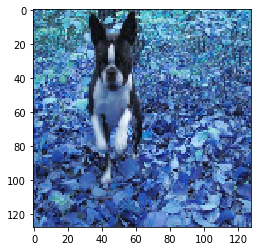

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_feature[0])

In [0]:
import numpy as np

In [0]:
x_feature=np.asarray(x_feature)

In [19]:
x_feature.shape

(10222, 128, 128, 3)

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
X = x_feature.astype('float32')
X /= 255

In [0]:
X=X.reshape(X.shape[0],128,128,3)

In [24]:
X.shape

(10222, 128, 128, 3)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [25]:
from sklearn.model_selection import train_test_split

X_train_data , X_val, y_train_data, y_val = train_test_split(X, y, test_size=0.2, random_state=2)
print ("No. of images in train dataset: ", len(X_train_data))
print ("No. of images in Validation dataset: ", len(X_val))

No. of images in train dataset:  8177
No. of images in Validation dataset:  2045


In [26]:
X_train_data.shape

(8177, 128, 128, 3)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_sub=pd.read_csv('sample_submission.csv')

In [0]:
test_img=sample_sub['id']

In [0]:
import cv2
from tqdm import tqdm

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []

for dogtestid in tqdm(test_img.values):
  test_img=cv2.imread('./test/{}.jpg'.format(dogtestid), 1)
  test_img_resize=cv2.resize(test_img, (img_rows, img_cols))
  x_test_feature.append(test_img_resize)

100%|██████████| 10357/10357 [37:12<00:00,  7.12it/s]


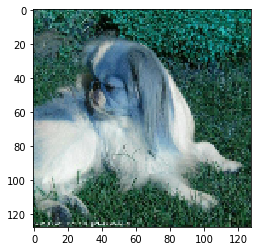

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_test_feature[0])

Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature=np.asarray(x_test_feature)
X_test= x_test_feature.astype('float32')
X_test /= 255

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [30]:
import tensorflow.keras
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
input_shape = (img_rows, img_cols, 3)

Using TensorFlow backend.


In [0]:
num_classes=120
#Initialize the model
model = Sequential()
#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1', input_shape=(128,128,3)))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_2'))

model.add(Flatten())

model.add(Dense(256, activation='relu',name='dense_11'))

model.add(Dense(120, activation='softmax',name='dense_12'))

In [0]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy


#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 60, 60, 64)        18496     
_________________________________________________________________
max_2 (MaxPooling2D)         (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               14745856  
_________________________________________________________________
dense_12 (Dense)             (None, 120)              

### Use batch_size = 128 and epochs = 10 and execute the model

In [36]:
batch_size=128
epochs=10
model.fit(X_train_data, y_train_data,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 4s 548us/sample - loss: 4.7566 - accuracy: 0.0212 - val_loss: 4.7746 - val_accuracy: 0.0181
Epoch 2/10
8177/8177 [==============================] - 4s 539us/sample - loss: 4.7535 - accuracy: 0.0204 - val_loss: 4.7728 - val_accuracy: 0.0181
Epoch 3/10
8177/8177 [==============================] - 4s 534us/sample - loss: 4.7497 - accuracy: 0.0218 - val_loss: 4.7702 - val_accuracy: 0.0161
Epoch 4/10
8177/8177 [==============================] - 4s 534us/sample - loss: 4.7457 - accuracy: 0.0207 - val_loss: 4.7676 - val_accuracy: 0.0176
Epoch 5/10
8177/8177 [==============================] - 4s 539us/sample - loss: 4.7413 - accuracy: 0.0219 - val_loss: 4.7645 - val_accuracy: 0.0176
Epoch 6/10
8177/8177 [==============================] - 4s 540us/sample - loss: 4.7364 - accuracy: 0.0234 - val_loss: 4.7617 - val_accuracy: 0.0166
Epoch 7/10
8177/8177 [==============================] - 4s 543us

In [38]:
score = model.evaluate(X_val, y_val)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2045/2045 [==============================] - 1s 287us/sample - loss: 4.7458 - accuracy: 0.0181
Test loss: 4.745807010911788
Test accuracy: 0.01809291


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from tensorflow.keras.layers import ZeroPadding2D

In [0]:
train_datagen=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_generator=train_datagen.flow(X_train_data, y=y_train_data, batch_size=32)
val_generator=train_datagen.flow(X_val, y=y_val, batch_size=32)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [43]:
model.fit_generator(
        train_generator,
        epochs=10,
        validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 256 steps, validate for 64 steps
Epoch 1/10
256/256 [==============================] - 37s 143ms/step - loss: 4.7869 - accuracy: 0.0174 - val_loss: 4.7871 - val_accuracy: 0.0152
Epoch 2/10
256/256 [==============================] - 36s 140ms/step - loss: 4.7866 - accuracy: 0.0138 - val_loss: 4.7870 - val_accuracy: 0.0122
Epoch 3/10
256/256 [==============================] - 36s 140ms/step - loss: 4.7864 - accuracy: 0.0142 - val_loss: 4.7869 - val_accuracy: 0.0117
Epoch 4/10
256/256 [==============================] - 36s 140ms/step - loss: 4.7861 - accuracy: 0.0126 - val_loss: 4.7868 - val_accuracy: 0.0122
Epoch 5/10
256/256 [==============================] - 36s 139ms/step - loss: 4.7858 - accuracy: 0.0125 - val_loss: 4.7867 - val_accuracy: 0.0117
Epoch 6/10
256/256 [==============================] - 36s 140ms/step - loss: 4.7854 - accuracy: 0.0125 - v

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [49]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
from tensorflow.keras.models import Model

In [0]:
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
preds=Dense(120,activation='softmax')(x) #final layer with softmax activation

In [0]:
vgmodel=Model(inputs=base_model.input,outputs=preds)

In [56]:

for i,layer in enumerate(vgmodel.layers):
  print(i,layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_1
20 flatten_4
21 dense_6
22 dense_7
23 dense_8


In [0]:
#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.001)
#Set the loss function and optimizer for the model training
vgmodel.compile(loss=categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in vgmodel.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [62]:
batch_size=128
epochs=10
vgmodel.fit(train_generator,
          epochs=epochs,
          verbose=1,
          validation_data=(val_generator))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 256 steps, validate for 64 steps
Epoch 1/10
256/256 [==============================] - 57s 225ms/step - loss: 4.7908 - accuracy: 0.0108 - val_loss: 4.7945 - val_accuracy: 0.0098
Epoch 2/10
256/256 [==============================] - 49s 193ms/step - loss: 4.7854 - accuracy: 0.0110 - val_loss: 4.7935 - val_accuracy: 0.0098
Epoch 3/10
256/256 [==============================] - 50s 194ms/step - loss: 4.7829 - accuracy: 0.0105 - val_loss: 4.7925 - val_accuracy: 0.0098
Epoch 4/10
256/256 [==============================] - 49s 193ms/step - loss: 4.7816 - accuracy: 0.0108 - val_loss: 4.7914 - val_accuracy: 0.0088
Epoch 5/10
256/256 [==============================] - 50s 194ms/step - loss: 4.7808 - accuracy: 0.0108 - val_loss: 4.7919 - val_accuracy: 0.0117
Epoch 6/10
256/256 [==============================] - 49s 192ms/step - loss: 4.7800 - accuracy: 0.0115 - val_loss: 4.7915 - val_accuracy: 0.0088
Epoch 7/10
256/256 [=================